In [2]:
from ultralytics import YOLO, solutions
import cv2
import numpy as np
import matplotlib.pyplot as plt
import supervision as sv
#!pip install jupyter
#!pip install matplotlib-inline

## img

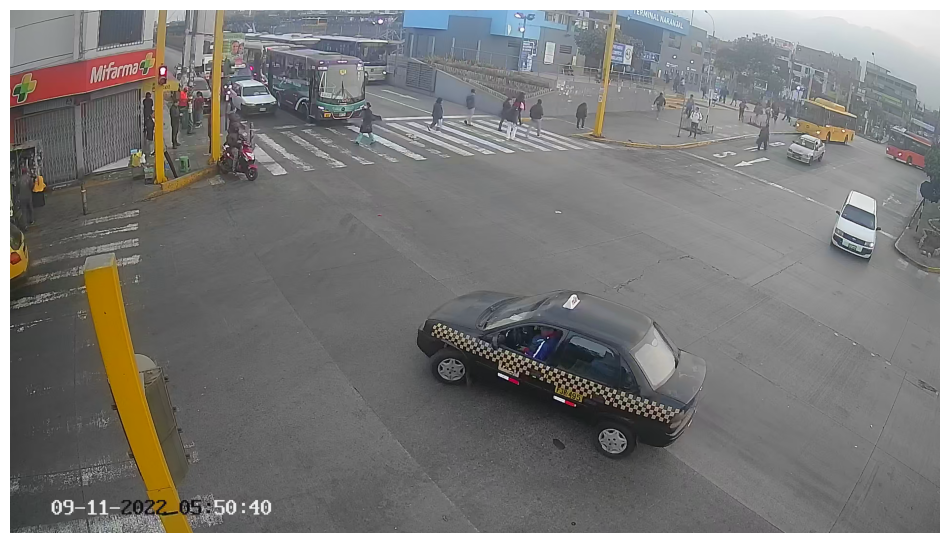

In [2]:
SOURCE_VIDEO_PATH = "../data/video1.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)

## applying model

In [ ]:
MODELS_PATH = ['../models/yolov8_runs4.pt', 
               '../models/yolo11n_runs7.pt',
               '../models/yolo11n_runs12.pt',
               '../models/yolo11n_runs13.pt'
               ]
SOURCE_VIDEO_PATH = "../data/video1.mp4"

In [58]:
def detection_img(SOURCE_VIDEO_PATH, MODELS_PATH, num_rows, num_cols):
    COLORS = sv.ColorPalette.from_hex(["#E6194B", "#3CB44B", "#FFE119", "#3C76D1"])
    COLOR_ANNOTATOR = sv.ColorAnnotator(color=COLORS)
    LABEL_ANNOTATOR = sv.LabelAnnotator(
        color=COLORS,
        text_scale=0.7,
        text_thickness=2,
        text_position=sv.Position.BOTTOM_CENTER
    )

    frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=1000)
    frame = next(frame_generator)

    # Initialize the plot with specified rows and columns
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
    axes = axes.ravel()  # Flatten the axes array to easily iterate over it

    # Ensure there are enough subplots to display each model's output
    num_models = len(MODELS_PATH)
    max_plots = num_rows * num_cols

    for i, model_path in enumerate(MODELS_PATH[:max_plots]):
        model = YOLO(model_path)
        
        # Run detection with the current model
        result = model(frame, conf=0.5, imgsz=1280, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(result)
        detections = detections.with_nms(class_agnostic=True)
        detections = detections[detections.class_id != 0]

        # Prepare custom color lookup if necessary
        custom_color_lookup = np.array([
            model.names[class_id]
            for class_id in detections.class_id
        ])

        # Annotate the frame
        annotated_frame = frame.copy()
        annotated_frame = COLOR_ANNOTATOR.annotate(
            annotated_frame, detections
        )
        annotated_frame = LABEL_ANNOTATOR.annotate(
            annotated_frame, detections
        )

        # Plot the annotated frame on the subplot
        ax = axes[i]
        ax.imshow(annotated_frame)
        ax.set_title(f"Model: {model_path.split('/')[-1]}")
        ax.axis("off")

    # Hide any extra subplots if there are more subplots than models
    for j in range(num_models, max_plots):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


[hevc @ 0x606dfa0c85c0] Could not find ref with POC 83


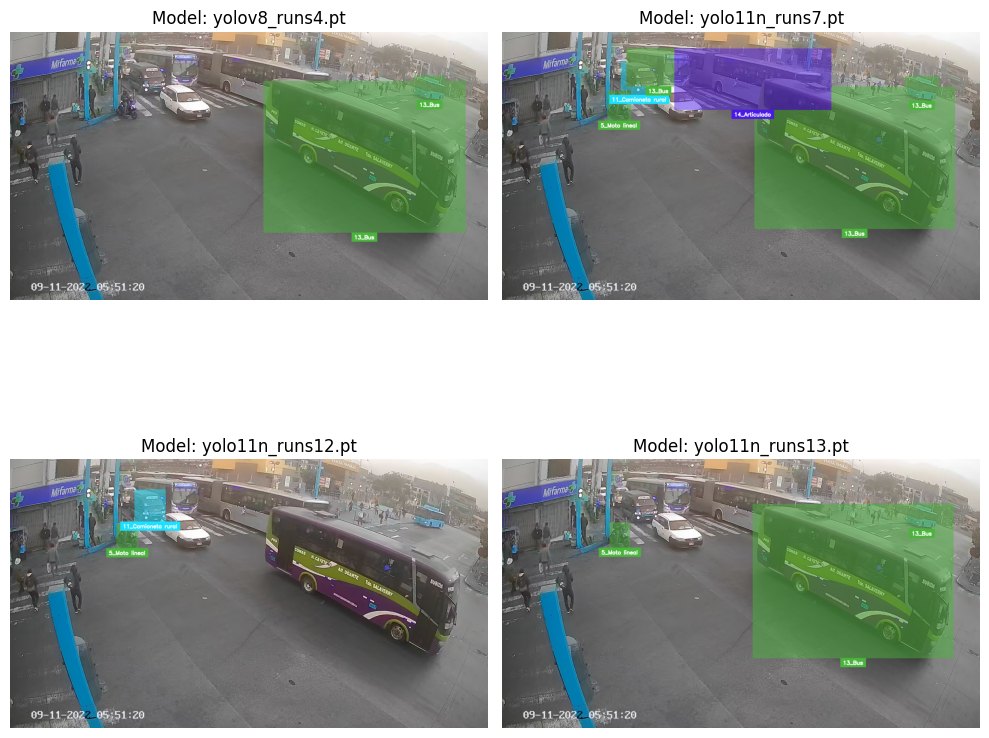

In [59]:
detection_img(SOURCE_VIDEO_PATH, MODELS_PATH, 2, 2)

## ZONES

In [9]:
COLORS = sv.ColorPalette.from_hex(["#E6194B", "#3CB44B", "#FFE119", "#3C76D1"])

cap = cv2.VideoCapture(SOURCE_VIDEO_PATH)
ret, frame = cap.read()
cap.release()

#region1 = np.array([(380, 370), (380, 390),    (1350, 280), (1350, 260)], np.int32) # Blue
#region2 = np.array([(1370, 280),(1400, 280),   (1850, 460), (1810, 460)], np.int32) # green
#region3 = np.array([(380, 400), (360, 400),    (400, 1000), (430, 1000)], np.int32) # red
#region4 = np.array([(420, 1020), (450, 1040),   (1850, 490), (1820, 480)], np.int32) # black

LINE_1_START = sv.Point(490, 320)
LINE_1_END = sv.Point(1200, 250)

LINE_2_START = sv.Point(1370, 280)
LINE_2_END = sv.Point(1850, 460)

LINE_3_START = sv.Point(450, 1020)
LINE_3_END = sv.Point(1880, 570)

LINE_4_START = sv.Point(400, 350)
LINE_4_END = sv.Point(420, 1000)

In [10]:
LINE_ZONE_1 = sv.LineZone(
    start=LINE_1_START,
    end=LINE_1_END,
    triggering_anchors=(sv.Position.BOTTOM_CENTER,)
)

LINE_ZONE_2 = sv.LineZone(
    start=LINE_2_START,
    end=LINE_2_END,
    triggering_anchors=(sv.Position.BOTTOM_CENTER,)
)

LINE_ZONE_3 = sv.LineZone(
    start=LINE_3_START,
    end=LINE_3_END,
    triggering_anchors=(sv.Position.BOTTOM_CENTER,)
)

LINE_ZONE_4 = sv.LineZone(
    start=LINE_4_START,
    end=LINE_4_END,
    triggering_anchors=(sv.Position.BOTTOM_CENTER,)
)

#POLYGON_ZONE = sv.PolygonZone(
#    polygon=POLYGON,
#    triggering_anchors=(sv.Position.CENTER,)
#)

LINE_ZONE_ANNOTATOR = sv.LineZoneAnnotator(
    text_scale=0.8,
    text_orient_to_line=True,
    display_text_box=True,
    text_centered=False
)

COLOR_ANNOTATOR = sv.ColorAnnotator(color=COLORS)
LABEL_ANNOTATOR = sv.LabelAnnotator(
    color=COLORS,
    text_scale=0.7,
    text_thickness=2,
    text_position=sv.Position.BOTTOM_CENTER
)

In [ ]:
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=60 * 10)
frame = next(frame_generator)

result = model(frame, conf=0.35, imgsz=1280, verbose=False)[0]
detections = sv.Detections.from_ultralytics(result)
detections = detections.with_nms(class_agnostic=True)
detections = detections[detections.class_id != 0]
#detections = detections[POLYGON_ZONE.trigger(detections)]
#custom_color_lookup = np.array([
#    CLASS_MAPPING[class_id]
#    for class_id
#    in detections.class_id
#])

annotated_frame = frame.copy()
#annotated_frame = sv.draw_polygon(
#    scene=annotated_frame,
#    polygon=POLYGON,
#    color=sv.Color.WHITE,
#    thickness=3
#)



annotated_frame = COLOR_ANNOTATOR.annotate(
    annotated_frame, detections)
    #custom_color_lookup=custom_color_lookup)
annotated_frame = LABEL_ANNOTATOR.annotate(
    annotated_frame, detections)
    #custom_color_lookup=custom_color_lookup)

annotated_frame = LINE_ZONE_ANNOTATOR.annotate(
    frame=annotated_frame, line_counter=LINE_ZONE_1
)
annotated_frame = LINE_ZONE_ANNOTATOR.annotate(
    frame=annotated_frame, line_counter=LINE_ZONE_2
)
annotated_frame = LINE_ZONE_ANNOTATOR.annotate(
    frame=annotated_frame, line_counter=LINE_ZONE_3
)

annotated_frame = LINE_ZONE_ANNOTATOR.annotate(
    frame=annotated_frame, line_counter=LINE_ZONE_4
)

sv.plot_image(annotated_frame)


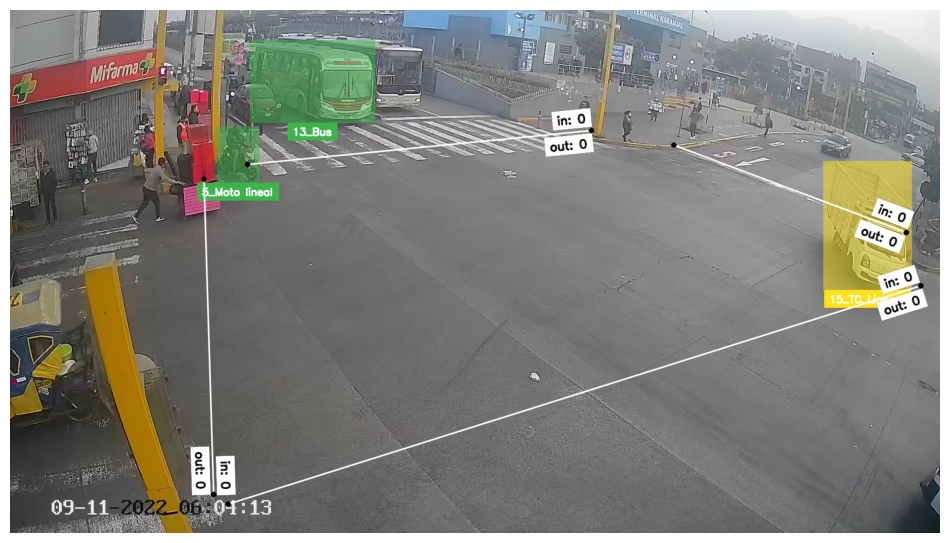

## video

In [2]:
import numpy as np
import supervision as sv
from tqdm import tqdm
import time

SOURCE_VIDEO_PATH = "../data/video1.mp4"
TARGET_VIDEO_PATH = "video.mp4"
COLORS = sv.ColorPalette.from_hex(["#E6194B", "#3CB44B", "#FFE119", "#3C76D1"])

model = YOLO('../models/best.pt')

LINE_1_START = sv.Point(490, 320)
LINE_1_END = sv.Point(1200, 250)

LINE_2_START = sv.Point(1370, 280)
LINE_2_END = sv.Point(1850, 460)

LINE_3_START = sv.Point(450, 1020)
LINE_3_END = sv.Point(1880, 570)

LINE_4_START = sv.Point(400, 350)
LINE_4_END = sv.Point(420, 1000)


LINE_ZONE_1 = sv.LineZone(
    start=LINE_1_START,
    end=LINE_1_END,
    triggering_anchors=(sv.Position.BOTTOM_CENTER,)
)

LINE_ZONE_2 = sv.LineZone(
    start=LINE_2_START,
    end=LINE_2_END,
    triggering_anchors=(sv.Position.BOTTOM_CENTER,)
)

LINE_ZONE_3 = sv.LineZone(
    start=LINE_3_START,
    end=LINE_3_END,
    triggering_anchors=(sv.Position.BOTTOM_CENTER,)
)

LINE_ZONE_4 = sv.LineZone(
    start=LINE_4_START,
    end=LINE_4_END,
    triggering_anchors=(sv.Position.BOTTOM_CENTER,)
)

#POLYGON_ZONE = sv.PolygonZone(
#    polygon=POLYGON,
#    triggering_anchors=(sv.Position.CENTER,)
#)

LINE_ZONE_ANNOTATOR = sv.LineZoneAnnotator(
    text_scale=0.8,
    text_orient_to_line=True,
    display_text_box=True,
    text_centered=False
)

LINE_ZONE_ANNOTATOR_MULTICLASS = sv.LineZoneAnnotatorMulticlass(
    text_scale=0.8,
    text_thickness=2,
    table_margin=20
)

COLOR_ANNOTATOR = sv.ColorAnnotator(color=COLORS)
LABEL_ANNOTATOR = sv.LabelAnnotator(
    color=COLORS,
    text_scale=0.7,
    text_thickness=2,
    text_position=sv.Position.BOTTOM_CENTER
)
TRACK_ANNOTATOR = sv.TraceAnnotator(
    color=COLORS,
    trace_length=60 * 2
)

TRACKER = sv.ByteTrack(minimum_consecutive_frames=5)
TRACKER.reset()

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)#, start=60 * 10, end=60 * 70)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

with video_sink:
    for frame_idx, frame in tqdm(enumerate(frame_generator)):

        result = model(frame, conf=0.35, imgsz=1280, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(result)
        detections = detections.with_nms(class_agnostic=True)
        detections = detections[np.isin(detections.class_id, [2, 3, 5, 7])]
        #detections = detections[POLYGON_ZONE.trigger(detections)]
        detections = TRACKER.update_with_detections(detections)

        #custom_color_lookup = np.array([
        #    CLASS_MAPPING[class_id]
        #    for class_id
        #    in detections.class_id
        #])

        if detections['class_name'] is None or len(detections['class_name']) == 0:
            detections['class_name'] = []

        labels = [
            f"{class_name} {confidence:.2f}"
            for class_name, confidence
            in zip(detections["class_name"], detections.confidence)
        ]

        LINE_ZONE_1.trigger(detections)
        LINE_ZONE_2.trigger(detections)
        LINE_ZONE_3.trigger(detections)
        LINE_ZONE_4.trigger(detections)

        annotated_frame = frame.copy()
        #annotated_frame = sv.draw_polygon(
        #    scene=annotated_frame,
        #    polygon=POLYGON,
        #    color=sv.Color.WHITE,
        #    thickness=3
        #)

        annotated_frame = COLOR_ANNOTATOR.annotate(
            annotated_frame, detections)
        annotated_frame = LABEL_ANNOTATOR.annotate(
            annotated_frame, detections,
            labels=labels)
        annotated_frame = TRACK_ANNOTATOR.annotate(
            annotated_frame, detections)

        annotated_frame = LINE_ZONE_ANNOTATOR.annotate(
            frame=annotated_frame, line_counter=LINE_ZONE_1
        )
        annotated_frame = LINE_ZONE_ANNOTATOR.annotate(
            frame=annotated_frame, line_counter=LINE_ZONE_2
        )
        annotated_frame = LINE_ZONE_ANNOTATOR.annotate(
            frame=annotated_frame, line_counter=LINE_ZONE_3
        )
        annotated_frame = LINE_ZONE_ANNOTATOR.annotate(
            frame=annotated_frame, line_counter=LINE_ZONE_4
        )
        annotated_frame = LINE_ZONE_ANNOTATOR_MULTICLASS.annotate(
            frame=annotated_frame,
            line_zones=[LINE_ZONE_1, LINE_ZONE_2, LINE_ZONE_3, LINE_ZONE_4]
        )

        # Display the frame live
        cv2.imshow("Live Frame", annotated_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit early
            break

        video_sink.write_frame(annotated_frame)

0it [00:00, ?it/s]qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/angel/Documents/galois/VehicleTracking/.env/lib/python3.10/site-packages/cv2/qt/plugins"
450it [02:12,  3.40it/s]


## Cross line

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


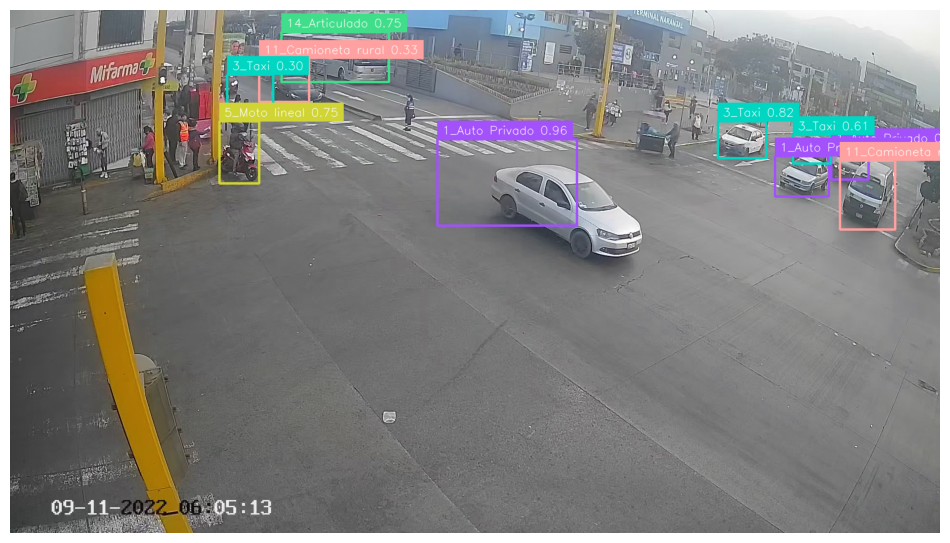

In [17]:
labels = [
    f"{results.names[class_id]} {confidence:0.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=3)
label_annotator = sv.LabelAnnotator(text_thickness=1, text_scale=0.8)

annotated_frame = frame.copy()
annotated_frame = bounding_box_annotator.annotate(annotated_frame, detections)
annotated_frame = label_annotator.annotate(annotated_frame, detections, labels)
sv.plot_image(annotated_frame, (12, 12))

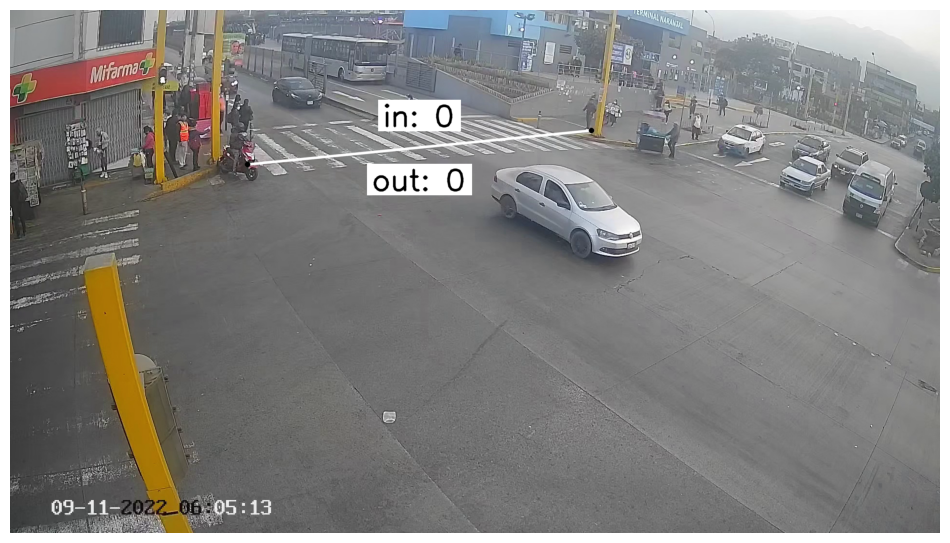

In [24]:
START = sv.Point(490, 320)
END = sv.Point(1200, 250)
'''
# Define region points
region1 = np.array([(380, 370), (380, 390),    (1350, 280), (1350, 260)], np.int32) # Blue
region2 = np.array([(1370, 280),(1400, 280),   (1850, 460), (1810, 460)], np.int32) # green
region3 = np.array([(380, 400), (360, 400),    (400, 1000), (430, 1000)], np.int32) # red
region4 = np.array([(420, 1020), (450, 1040),   (1850, 490), (1820, 480)], np.int32) # black
'''

line_zone = sv.LineZone(start=START, end=END)

line_zone_annotator = sv.LineZoneAnnotator(
    thickness=4,
    text_thickness=4,
    text_scale=2)

annotated_frame = frame.copy()
annotated_frame = line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)
sv.plot_image(annotated_frame, (12, 12))

In [4]:
import supervision as sv
import cv2

START = sv.Point(490, 320)
END = sv.Point(1200, 250)

image = cv2.imread('../data/video_test.mp4')

line_zone = sv.LineZone(
    start=START,
    end=END
)

line_zone_annotator = sv.LineZoneAnnotatorMulticlass()

frame = line_zone_annotator.annotate(
    frame=frame, line_zones=[line_zone]
)

sv.plot_image(frame)

NameError: name 'frame' is not defined

In [ ]:
model = YOLO("yolo11n.pt")
image = cv.imread('../data/demo.jpg')
results = model(image, classes=[1])
for x,y,w,h in results[0].boxes.xywh:
    x, y, w, h = int(x.item()), int(y.item()), int(w.item()), int(h.item())
    dummy = cv.rectangle(image, (int(x-w/2), int(y-h/2)), (int(x + w/2), int(y + h/2)), (255, 0, 0), 2) 
plt.imshow(dummy)

In [ ]:
my_dict = model.names

values_to_find = ['banana', 'orange']

# Create a dictionary to store the result
keys_for_values = {value: [] for value in values_to_find}

# Loop through the dictionary and find keys for each value
for key, value in my_dict.items():
    if value in values_to_find:
        keys_for_values[value] = key

print(keys_for_values)

In [ ]:
for x,y,w,h in results[0].boxes.xywh:
    x, y, w, h = int(x.item()), int(y.item()), int(w.item()), int(h.item())
    print(x, y, w, h)

In [ ]:
result = model(image,classes=[1], show_boxes=True)

In [ ]:
plt.imshow(results[0].orig_img)

In [ ]:
def update_frame():
    if running:
        ret, frame = cap.read()

        ## MODEL
        tracks = model.track(frame, persist=True, show=False)
        frame = counter.start_counting(frame, tracks)
        frame = counter2.start_counting(frame, tracks)

        count1 = counter.class_wise_count
        total1 = {}
        for i in count1.keys():
            total1[i] = count1[i]['IN'] + count1[i]['OUT']
        
        count2 = counter2.class_wise_count
        total2 = {}
        for i in count2.keys():
            total2[i] = count2[i]['IN'] + count2[i]['OUT']

        # Unir diccionarios
        diccionario_unido = {}

        # Recorrer todas las claves únicas de ambos diccionarios
        for clave in set(total1.keys()).union(total2.keys()):
            valor1 = total1.get(clave, 0)  # Obtiene el valor del diccionario1 o 0 si no existe
            valor2 = total2.get(clave, 0)  # Obtiene el valor del diccionario2 o 0 si no existe

            if isinstance(valor1, int) and isinstance(valor2, int) and valor1 == 0 and valor2 == 0:
                diccionario_unido[clave] = [0,0]  # Si ambos valores son 0, poner 0 en el diccionario unido
            else:
                diccionario_unido[clave] = [valor1, valor2]  # Combinar los valores en una lista


        for i in diccionario_unido.keys():   
            update_row(i, diccionario_unido[i][0], diccionario_unido[i][1], diccionario_unido[i][1]+diccionario_unido[i][0])


        if ret:
            # Resize the frame to fit the specified dimensions
            frame = cv2.resize(frame, (FRAME_WIDTH, FRAME_HEIGHT))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img = Image.fromarray(frame)
            imgtk = ImageTk.PhotoImage(image=img)
            label.imgtk = imgtk
            label.configure(image=imgtk)
        label.after(10, update_frame)